<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/proba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn openpyxl

Точность модели: 0.53
Вероятность явки: 0.00


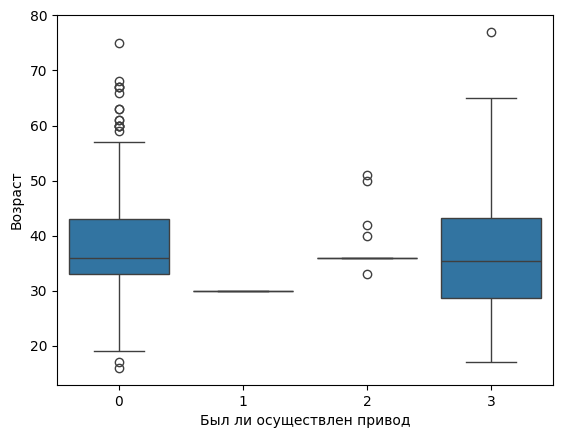

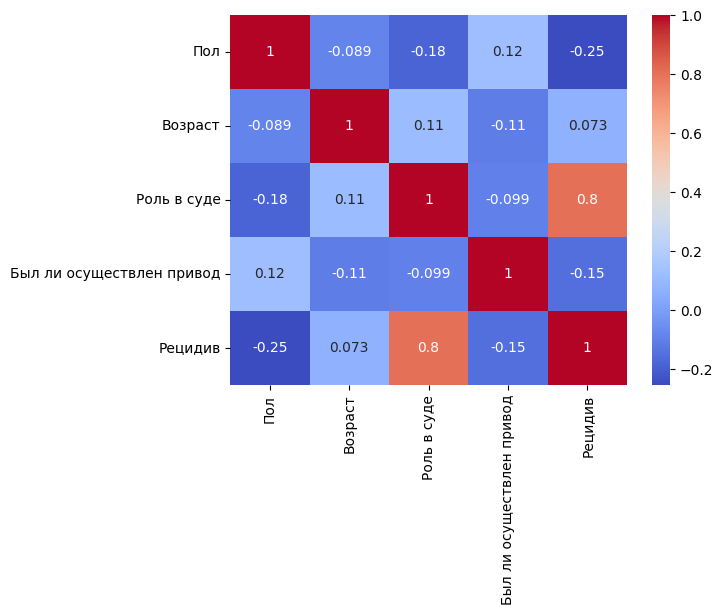

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_excel('/content/data_set3.xlsx')
data.replace('н.д.', pd.NA, inplace=True)
data['Возраст'].fillna(data['Возраст'].median(), inplace=True)

# Инициализация LabelEncoder для каждого категориального столбца
le_dict = {column: LabelEncoder() for column in ['Пол', 'Роль в суде', 'Был ли осуществлен привод', 'Рецидив']}

# Кодирование каждого категориального столбца и сохранение обученных LabelEncoder
for column in le_dict.keys():
    data[column] = le_dict[column].fit_transform(data[column])

X = data.drop('Был ли осуществлен привод', axis=1)  # Все столбцы кроме целевой переменной
y = data['Был ли осуществлен привод']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Точность модели: {accuracy:.2f}")

# Пример данных для предсказания (замените значения на актуальные)
new_data = pd.DataFrame({
    'Пол': [le_dict['Пол'].transform(['Мужской'])[0]],
    'Возраст': [41],
    'Роль в суде': [le_dict['Роль в суде'].transform(['Обвиняемый'])[0]],
    'Рецидив': [le_dict['Рецидив'].transform(['Да'])[0]]
})

# Предсказание вероятности явки
predicted_proba = model.predict_proba(new_data)
print(f"Вероятность явки: {predicted_proba[0][1]:.2f}")

# График распределения возраста по явке в суд
sns.boxplot(x='Был ли осуществлен привод', y='Возраст', data=data)
plt.show()

# Корреляционная матрица
corr = data.corr()  # Исправление здесь: используем переменную data
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Средняя точность: {scores.mean():.2f}, Стандартное отклонение: {scores.std():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Средняя точность: 0.53, Стандартное отклонение: 0.04
